<a href="https://colab.research.google.com/github/RudyHarun99/H8_056/blob/master/PYTN_Assgn_2_056_Rudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**NYC PROPERTY SALES**

##Project Overview

This dataset contains the location, address, type, sale price, and sale date of building units sold. A refrence on the trickier fields:
- BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronkx (2), Brooklyn (3), Queens (4), and Staten Island (5).
- BLOCK: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly callad a BBL.
- BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:
- Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deed between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
- This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire bulding. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartements) owned by some individual.

##Data Preparation

In [ ]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = '/content/gdrive/MyDrive/DATA/Hacktiv8_ptp_python/nyc-rolling-sales.csv'
df = pd.read_csv(path)
df.shape

(84548, 22)

In [ ]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [ ]:
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,,10309,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


Dari head dan tail, kita lihat ada beberapa kolom yang kosong, yaitu kolom *EASE-MENT* dan *APARTMENT NUMBER*, maka kita akan periksa apakah benar semua value dari kolom tersebut kosong?

In [ ]:
(df['EASE-MENT'] != ' ').sum()

0

In [ ]:
(df['APARTMENT NUMBER'] != ' ').sum()

19052

Ternyata seluruh value dari kolom *EASE-MENT* kosong, dan kolom *APARTMENT NUMBER* tidak semua kosong. Selain itu, kolom *Unnamed* juga tidak dibutuhkan, maka kita akan drop kolom *Unnamed* dan *EASE-MENT*.

In [ ]:
df.drop(['Unnamed: 0', 'EASE-MENT'], axis=1, inplace=True)

In [ ]:
df.isnull().any()

BOROUGH                           False
NEIGHBORHOOD                      False
BUILDING CLASS CATEGORY           False
TAX CLASS AT PRESENT              False
BLOCK                             False
LOT                               False
BUILDING CLASS AT PRESENT         False
ADDRESS                           False
APARTMENT NUMBER                  False
ZIP CODE                          False
RESIDENTIAL UNITS                 False
COMMERCIAL UNITS                  False
TOTAL UNITS                       False
LAND SQUARE FEET                  False
GROSS SQUARE FEET                 False
YEAR BUILT                        False
TAX CLASS AT TIME OF SALE         False
BUILDING CLASS AT TIME OF SALE    False
SALE PRICE                        False
SALE DATE                         False
dtype: bool

In [ ]:
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

Bila kita perhatikan dari info, kolom *SALE PRICE* bertipe object, kita perlu ubah ke bentuk int atau float terlebih dahulu.

In [ ]:
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
print(df['SALE PRICE'].dtypes)

float64


In [ ]:
df['SALE PRICE'].isnull().any()

True

In [ ]:
df['SALE PRICE'].isnull().sum()

14561

Setelah diubah ke bentu float, kolom *SALE PRICE* memiliki nilai null sebanyak 14561 baris, maka kita akan drop baris tersebut.

In [ ]:
df.dropna(subset=['SALE PRICE'], inplace=True)
df.shape

(69987, 20)

In [ ]:
df['SALE PRICE'].isnull().any()

False

Setelah tidak ada nilai null, kita bisa melakukan perhitungan terhadap kolom *SALE PRICE*.

##Measure of Central Tendency

In [ ]:
df.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,69987.000000,69987.000000,69987.000000,69987.000000,69987.000000,69987.000000,69987.000000,69987.000000,69987.000000,6.998700e+04
mean,2.921928,4196.072528,373.828397,10741.455185,1.899553,0.172489,2.092203,1799.348236,1.641976,1.276456e+06
std,1.235688,3429.196524,656.096528,1263.234938,14.549545,9.123717,17.276100,520.884552,0.771162,1.140526e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00
25%,2.000000,1348.000000,22.000000,10306.000000,0.000000,0.000000,0.000000,1920.000000,1.000000,2.250000e+05
50%,3.000000,3378.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1937.000000,2.000000,5.300000e+05
75%,4.000000,6186.000000,709.000000,11249.000000,2.000000,0.000000,2.000000,1965.000000,2.000000,9.500000e+05
max,5.000000,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000,2.210000e+09


###Mean

In [ ]:
df_sale_price = df['SALE PRICE']
df_sale_price

0         6625000.0
3         3936272.0
4         8000000.0
6         3192840.0
9        16232000.0
            ...    
84543      450000.0
84544      550000.0
84545      460000.0
84546    11693337.0
84547       69300.0
Name: SALE PRICE, Length: 69987, dtype: float64

In [ ]:
mean_ = sum(df_sale_price) / len(df_sale_price)
mean_

1276456.4977638705

In [ ]:
print(statistics.mean(df_sale_price))
print(np.mean(df_sale_price))
print(df_sale_price.mean())

1276456.4977638705
1276456.4977638705
1276456.4977638705


Mean dari kolom *SALE PRICE* adalah 1276456.4977638705

###Median

In [ ]:
if len(df_sale_price) % 2:
  median_ = sorted(df_sale_price)[round(0.5 * (len(df_sale_price) - 1))]
else:
  x_ord, index = sorted(x), round(0.5 * len(df_sale_price))
  median_ = 0.5 * (x_ord[index - 1] + x_ord[index])

median_

530000.0

In [ ]:
print(statistics.median(df_sale_price))
print(np.median(df_sale_price))
print(df_sale_price.median())

530000.0
530000.0
530000.0


Median dari kolom *SALE PRICE* adalah 530000.0

###Mode

In [ ]:
print(statistics.mode(df_sale_price))
print(df_sale_price.mode())
print(scipy.stats.mode(df_sale_price))

0.0
0    0.0
dtype: float64
ModeResult(mode=array([0.]), count=array([10228]))


Mode dari kolom *SALE PRICE* adalah 0.0 sebanyak 10228 kemunculan

##Measure of Spread

In [ ]:
scipy.stats.describe(df_sale_price, ddof=1, bias=False)

DescribeResult(nobs=69987, minmax=(0.0, 2210000000.0), mean=1276456.4977638705, variance=130079849507172.7, skewness=124.09425128278802, kurtosis=21493.72293236857)

###Range

In [ ]:
print(np.ptp(df_sale_price))
print(np.amax(df_sale_price) - np.amin(df_sale_price))
print(df_sale_price.max() - df_sale_price.min())

2210000000.0
2210000000.0
2210000000.0


Range dari kolom *SALE PRICE* adalah sebesar 2210000000.0 dimulai dari 0.0 sampai dengan 2210000000.0

###Variance

In [ ]:
var_ = sum((item - mean_) ** 2 for item in df_sale_price) / (len(df_sale_price) - 1)
var_

130079849507240.9

In [ ]:
print(statistics.variance(df_sale_price))
print(np.var(df_sale_price, ddof=1))
print(df_sale_price.var(ddof=1))

130079849507172.66
130079849507240.9
130079849507240.9


Variance dari kolom *SALE PRICE* adalah 130079849507240.9

###Standard Deviation

In [ ]:
std_ = var_ ** 0.5
std_

11405255.345990326

In [ ]:
print(statistics.stdev(df_sale_price))
print(np.std(df_sale_price, ddof=1))
print(df_sale_price.std(ddof=1))

11405255.345987333
11405255.345990326
11405255.345990326


Standar Deviasi dari kolom *SALE PRICE* adalah 11405255.345990326

##Probability Distribution

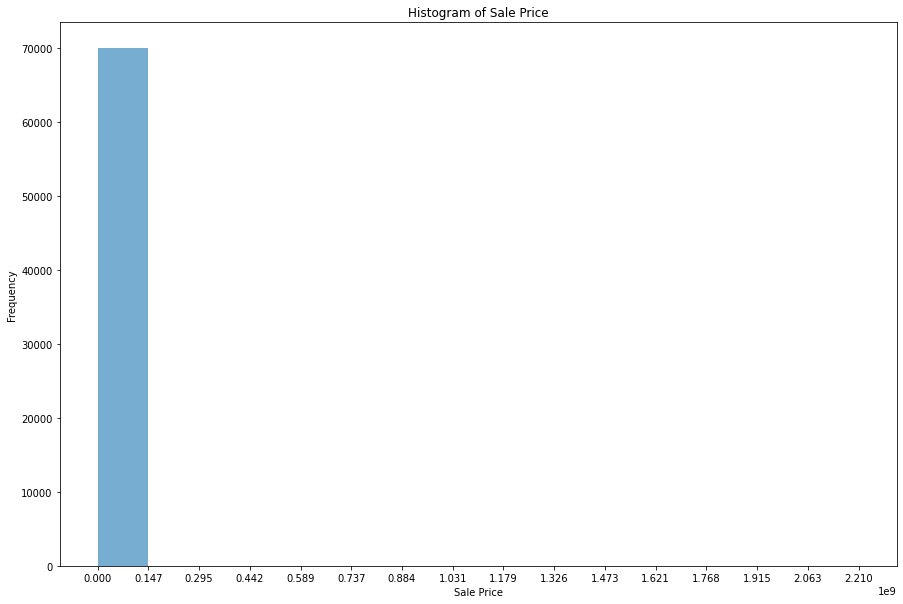

In [ ]:
count, bin_edges = np.histogram(df_sale_price, 15)

df_sale_price.plot(kind='hist',
          figsize=(15, 10),
          bins=15,
          alpha=0.6,
          xticks=bin_edges)

plt.title('Histogram of Sale Price')
plt.ylabel('Frequency')
plt.xlabel('Sale Price')

plt.show()

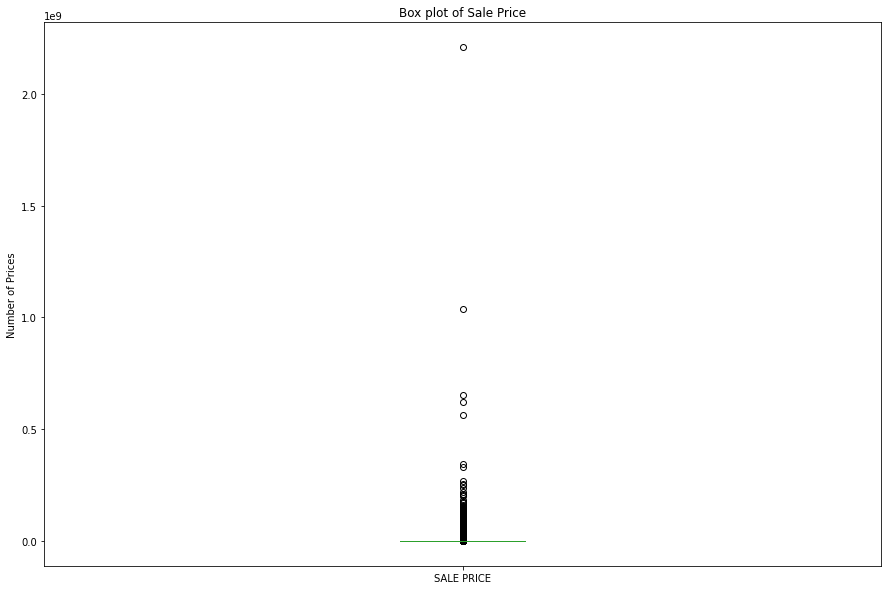

In [ ]:
df_sale_price.plot(kind='box', figsize=(15, 10))

plt.title('Box plot of Sale Price')
plt.ylabel('Number of Prices')

plt.show()

Histogram dan box plot di atas menunjukkan sebaran harga dari *SALE PRICE*, terlihat bahwa banyak harga 0.0 yang mana seperti dijelaskan pada overview, bahwa harga 0.0 tersebut memungkinkan terjadi dikarenakan terjadinya perpindahan kepemilikan properti dengan pihak lain, contohnya perpindahan kepemilikan properti dari orang tua kepada anaknya.

Untuk itu, kita akan mempersempit area perhitungan, di mana kita akan mengambil sebaran harga yang lebih banyak daripada 0.0 dan juga tidak akan mengambil harga dengan jarak sebaran yang lebih jauh, misalnya harga tertinggi. Kita akan mengambil sebaran harga dari 200 usd sampai dengan 3000000 usd, ini adalah rentang sebagian besar harga properti.

In [ ]:
new_df_sale_price = df_sale_price[(df_sale_price > 200) & (df_sale_price < 3000000)]
new_df_sale_price

13       499000.0
15       529500.0
16       423000.0
17       501000.0
18       450000.0
           ...   
84541    648000.0
84543    450000.0
84544    550000.0
84545    460000.0
84547     69300.0
Name: SALE PRICE, Length: 54526, dtype: float64

Jumlah data yang termasuk ke dalam rentang tersebut, sebanyak 54526

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


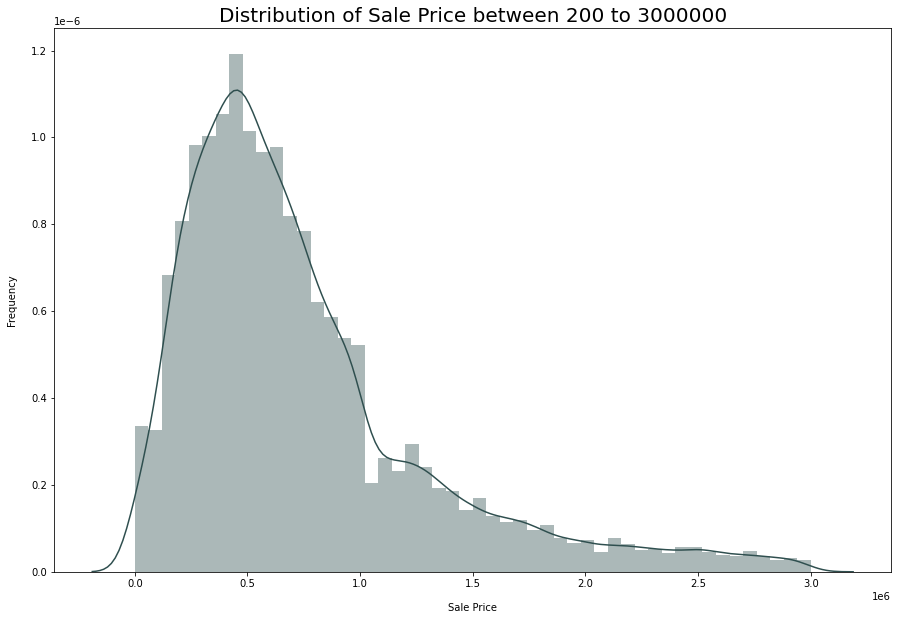

In [ ]:
plt.figure(figsize=(15, 10))
sns.distplot(new_df_sale_price, color='darkslategrey')
plt.ylabel('Frequency', labelpad=14)
plt.xlabel('Sale Price', labelpad=14)
plt.title('Distribution of Sale Price between 200 to 3000000', fontsize=20)
plt.show()

Dilihat dari grafik di atas, terlihat *Probability Distribution* dari *SALE PRICE* dengan rentang 200 sampai 3000000, menyerupai *Gamma Distribution*

##Confidence Intervals

In [ ]:
new_size = new_df_sale_price.size
new_mean = new_df_sale_price.mean()
new_std = new_df_sale_price.std()
z = 1.96
print('Sample price from 200 tp 3000000             :', new_size)
print('Mean price from 200 tp 3000000               :', new_mean)
print('Standart Deviation price from 200 tp 3000000 :', new_std)

Sample price from 200 tp 3000000             : 54526
Mean price from 200 tp 3000000               : 741943.4469977625
Standart Deviation price from 200 tp 3000000 : 557540.6908746746


In [ ]:
std_err = new_std / np.sqrt(new_size)
print('Standart Error :', std_err)

Standart Error : 2387.6724550135027


In [ ]:
lcb = new_mean - z * std_err
ucb = new_mean + z * std_err
print('Confidence Intervals')
print('Lower Class Boundaries :', lcb)
print('Upper Class Boundaries :', ucb)

Confidence Intervals
Lower Class Boundaries : 737263.608985936
Upper Class Boundaries : 746623.285009589


Confidence Intervals

Lower Class Boundaries : 737263.608985936

Upper Class Boundaries : 746623.285009589

##Hypothesis Testing

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df1 = df[df['BOROUGH'] == 1]['SALE PRICE'][(df_sale_price > 200) & (df_sale_price < 3000000)]
df2 = df[df['BOROUGH'] == 3]['SALE PRICE'][(df_sale_price > 200) & (df_sale_price < 3000000)]
sm.stats.ztest(df1, df2, alternative='two-sided')

(30.25392551704525, 4.632479383048973e-201)

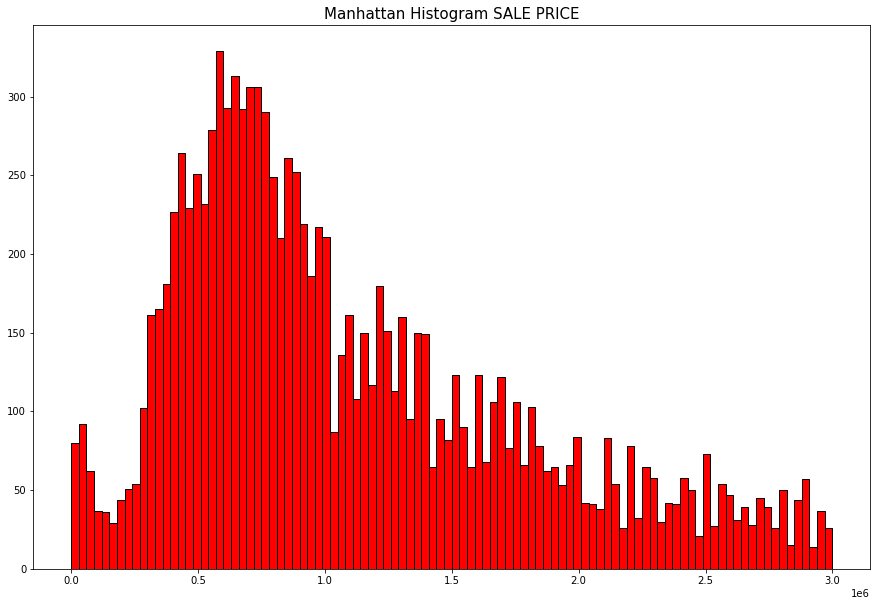

In [ ]:
plt.figure(figsize=(15, 10))
plt.title('Manhattan Histogram SALE PRICE', fontsize= 15)
plt.hist(df1, edgecolor='k', color='r', bins = 100)
plt.show()

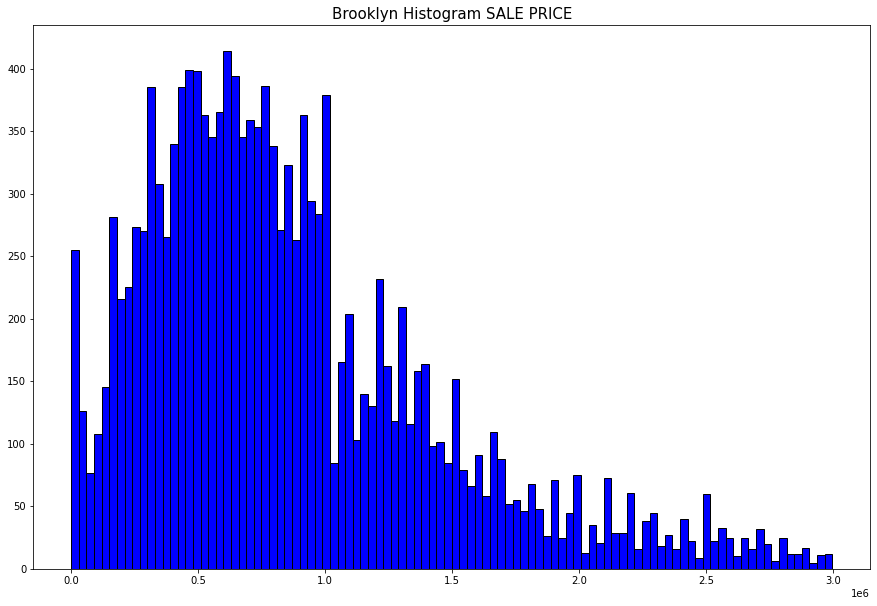

In [ ]:
plt.figure(figsize=(15, 10))
plt.title('Brooklyn Histogram SALE PRICE', fontsize= 15)
plt.hist(df2, edgecolor='k', color='b', bins = 100)
plt.show()